In [1]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
import neuralNet as nn
import matplotlib.pyplot as plt
import copy

In [2]:
all_data = loadmat("../ex3data1.mat")
X_all = all_data['X']
y_all = all_data['y']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = .9)
y_classes = np.unique(y_train)
classDict = dict(zip(range(len(y_classes)),y_classes))

/Users/johnsnyder/.virtualenvs/neuralNetTut/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
print(X_train.shape,X_test.shape)
print(y_classes)

(4500, 400) (500, 400)
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train).transpose()
y_train_onehot = label_binarize(y_train,y_classes).transpose()

X_test_scaled = scaler.transform(X_test).transpose()
y_test_onehot = label_binarize(y_test,y_classes).transpose()

In [6]:
print(scaler.mean_[25])
print(np.mean(X_train,axis=0)[25])

0.00022381488667997892
0.00022381488667997892


In [7]:
neuralNetMutExc = nn.fullyConnectClassHyper(X_train_scaled,y_train_onehot,classDict,[25,25,25], alpha =.05, p_keep = 0.5, regular = {"lambd":0.5, "N":2}, gradClip = 0.75, gradNorm = 0.5)

In [8]:
neuralNetMutExc.fit(100,X_test_scaled,y_test_onehot)

array([450.48228772,  28.90497325,  17.85687502,  19.1905109 ,
        23.30401378,  28.36975826,  29.81402796,  30.16076948,
        30.36333198,  30.63124603,  31.32443348,  32.95842993,
        36.23019916,  42.03301911,  46.4585487 ,  47.51245973,
        47.62150388,  47.70258824,  47.83413861,  47.872122  ,
        47.96365895,  48.28837927,  48.98460946,  50.33023076,
        52.9911976 ,  58.73972337,  63.90020103,  65.1292952 ,
        65.43603021,  65.64298355,  65.6297336 ,  65.7359001 ,
        65.76462691,  65.87260788,  65.86177496,  65.91632675,
        65.98914779,  66.19503551,  65.91619271,  66.4093828 ,
        66.11590866,  66.18007604,  66.44754724,  66.1428292 ,
        66.53316586,  66.35937498,  66.49772432,  66.67016154,
        66.71282121,  66.56772189,  66.74897028,  66.97809478,
        66.6223101 ,  67.03427409,  67.25150791,  66.7340383 ,
        67.00429724,  66.99681749,  67.19261385,  67.19695303,
        67.32837309,  67.52012894,  67.62313961,  67.58

In [19]:
print(neuralNetMutExc.train_loss_vec)
print(neuralNetMutExc.test_loss_vec)

[450.4822877181625, 28.90497324893656, 17.85687501693093, 19.19051089627892, 23.30401378125119, 28.369758264699968, 29.81402796271457, 30.160769475579176, 30.36333197672697, 30.63124603264158, 31.324433479119534, 32.958429932180195, 36.230199158136585, 42.0330191146527, 46.458548703139385, 47.51245972863038, 47.62150388242523, 47.70258823608456, 47.83413860878369, 47.872122003290045, 47.963658949445275, 48.28837927225809, 48.984609457414486, 50.33023075835882, 52.9911976023628, 58.73972336632039, 63.90020103488046, 65.12929519789833, 65.43603020729125, 65.64298355337, 65.62973360298913, 65.73590010453518, 65.76462690827418, 65.87260788499077, 65.86177496238203, 65.91632675013942, 65.98914779296264, 66.19503551318707, 65.91619270986907, 66.40938280396269, 66.11590866194153, 66.18007604390831, 66.44754723569845, 66.1428291995394, 66.53316585801278, 66.35937498336958, 66.49772432183329, 66.67016154329181, 66.71282121260825, 66.56772189432884, 66.74897028135254, 66.97809478399626, 66.62231

0.8445401899131543


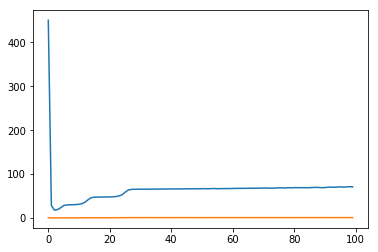

In [18]:
print(neuralNetMutExc.test_loss_vec[0])
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

In [10]:
#update hyperparameters
hyperDict = {"alpha":.01,"regular":{"N":2,"lambd":1}}
neuralNetMutExc.updateHyperparam(**hyperDict)

In [11]:
neuralNetMutExc.updateHyperparam(fakeParam = 2,fakeParam2 = 5)

The following are not valid hyperparameter names
 ['fakeParam2', 'fakeParam']
These are the hyperparameters and their values:

alpha :  0.01
gradClip :  0.75
regular :  {'N': 2, 'lambd': 1}
p_keep :  0.5
gradNorm :  0.5


In [12]:
neuralNetMutExc.fit(50)

array([91.72783244, 61.49232423, 50.16899443, 45.42603758, 43.17852374,
       42.04491339, 41.57957864, 41.43947673, 41.19144034, 41.32136734,
       41.33718782, 41.08970984, 41.1373441 , 41.2484654 , 41.01737648,
       41.1488523 , 41.1082114 , 41.09576007, 41.16865955, 41.12852726,
       41.18508507, 41.04301877, 41.03857158, 41.19580387, 41.09662933,
       41.1337141 , 41.19678943, 41.23328815, 41.03371546, 41.11511452,
       41.24838007, 41.16753548, 41.18211926, 41.06124875, 41.01658481,
       41.20427345, 41.18058259, 41.26481669, 41.27134408, 41.12832684,
       41.21765726, 41.16170903, 41.16032597, 41.23601537, 41.2199876 ,
       41.25882357, 41.19255808, 41.08604859, 41.15473096, 41.14965483])

435.66697767009845


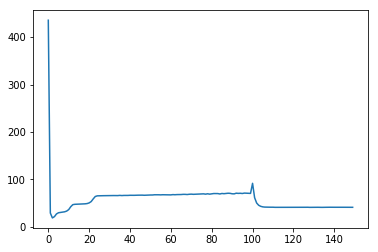

In [13]:
print(neuralNetMutExc.loss_vec[0])
plt.plot(neuralNetMutExc.loss_vec)
plt.show()

In [111]:
print(neuralNetMutExc.loss_vec[0])
plt.plot(neuralNetMutExc.loss_vec)
plt.show()

IndexError: list index out of range

In [14]:
neuralNetMutExc.updateAlpha(.05)
lossVector = neuralNetMutExc.fit(500)

In [15]:
front,back = 0,4

In [16]:
print(y_train[front:back])
print(y_train_onehot[:,front:back])
print(X_train_scaled[:,front:back].shape)


[[9]
 [6]
 [4]
 [8]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 0]]
(400, 4)


In [17]:
neuralNetMutExc.predict(X_train_scaled[:,front:back],y_train_onehot[:,front:back])

(array([[0.1       , 0.09963187, 0.10060632, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.1033132 , 0.09993263, 0.1       ]]),
 0.23036756038214373)

In [18]:
print("incoming activations:\n",neuralNetMutExc.layers[-1].A_prev)
print("Y_hat:\n",neuralNetMutExc.layers[-1].y_hat)
print("dY_hat:\n",np.divide(y_train_onehot[:,front:back],neuralNetMutExc.layers[-1].y_hat))
print("softmax delta:\n",neuralNetMutExc.layers[-1].softmax_delta(neuralNetMutExc.layers[-1].A_prev,y_train_onehot[:,front:back]))
print("incoming activation gradients:\n",neuralNetMutExc.layers[-1].backprop(y_train_onehot[:,front:back]))

incoming activations:
 [[0.         0.         0.00671886 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.03628305 0.         0.        ]]
Y_hat:
 [[0.1        0.09963187 0.10060632 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.1033132  0.09993263 0.1       ]]
dY_hat:
 [[ 0.          0. 

In [ ]:
X_test_scaled = scaler.transform(X_test).transpose()
